<a href="https://colab.research.google.com/github/filipenobre28/DesafioAluraAnalise_De__Dados/blob/main/AluraStoreBr_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [4]:
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()


faturamento_df = pd.DataFrame({
    'Loja': ['Loja1', 'Loja2', 'Loja3', 'Loja4'],
    'Faturamento Total': [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
})

print(faturamento_df)

    Loja  Faturamento Total
0  Loja1         1534509.12
1  Loja2         1488459.06
2  Loja3         1464025.03
3  Loja4         1384497.58


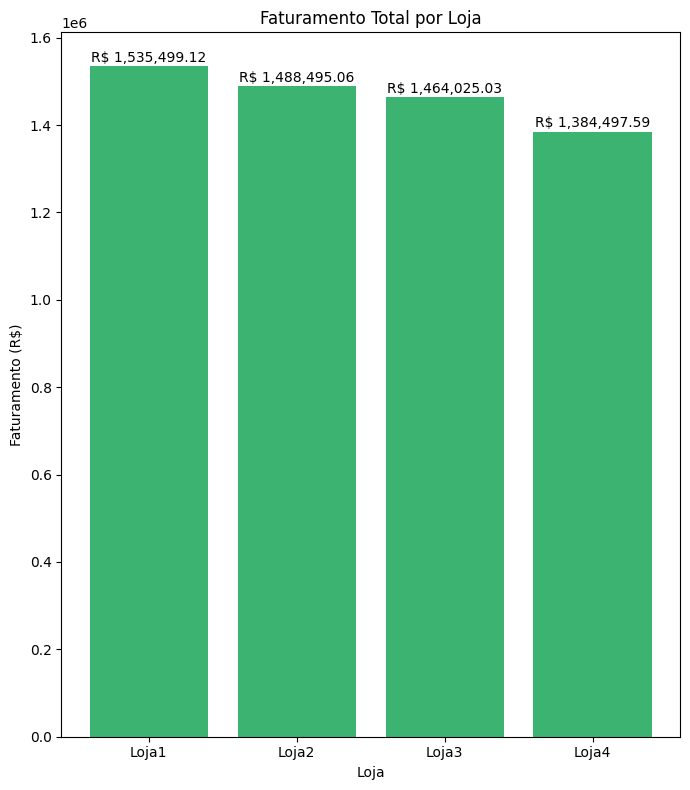

In [15]:
import matplotlib.pyplot as plt


lojas = ['Loja1', 'Loja2', 'Loja3', 'Loja4']
faturamento = [1535499.12, 1488495.06, 1464025.03, 1384497.59]


plt.figure(figsize=(7, 8))
plt.bar(lojas, faturamento, color='mediumseagreen')


plt.title('Faturamento Total por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.tight_layout()


for i, valor in enumerate(faturamento):
    plt.text(i, valor + 10000, f'R$ {valor:,.2f}', ha='center')


plt.show()


# 2. Vendas por Categoria


Quantidade de produtos vendidos por categoria e loja:
    Loja Categoria do Produto  Quantidade
0  Loja1          eletronicos           4
1  Loja2               moveis           1
2  Loja3           brinquedos           1
3  Loja4               moveis           5

Categoria mais popular por loja:
    Loja Categoria do Produto  Quantidade
0  Loja1          eletronicos           4
1  Loja2               moveis           1
2  Loja3           brinquedos           1
3  Loja4               moveis           5


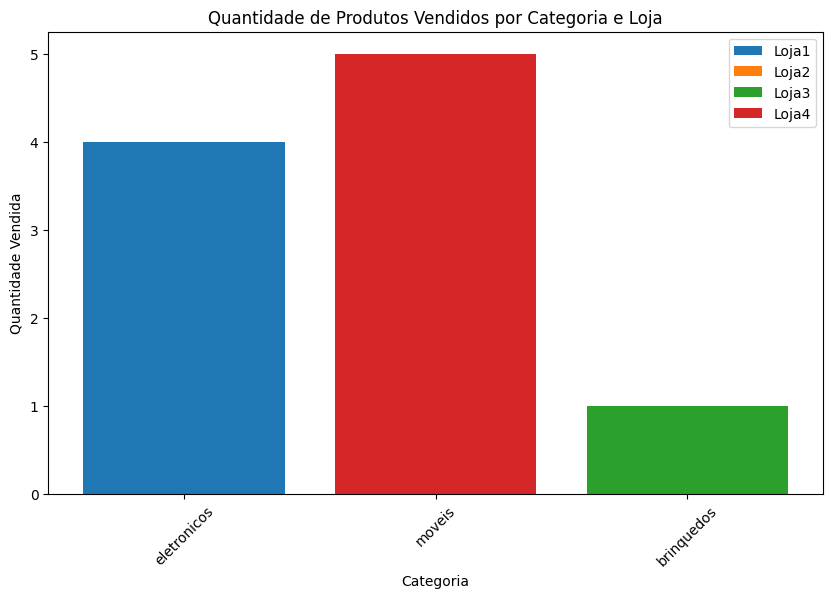

In [17]:
import pandas as pd

data = {
    'Loja': ['Loja1', 'Loja2', 'Loja3', 'Loja4'],
    'Categoria do Produto': ['eletronicos', 'moveis', 'brinquedos', 'moveis'],
    'Quantidade': [4, 1, 1, 5]
}

df = pd.DataFrame(data)

vendas_por_categoria = df.groupby(['Loja', 'Categoria do Produto'])['Quantidade'].sum().reset_index()


categoria_mais_popular = vendas_por_categoria.loc[vendas_por_categoria.groupby('Loja')['Quantidade'].idxmax()]


print("Quantidade de produtos vendidos por categoria e loja:")
print(vendas_por_categoria)
print("\nCategoria mais popular por loja:")
print(categoria_mais_popular)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for loja in vendas_por_categoria['Loja'].unique():
    dados_loja = vendas_por_categoria[vendas_por_categoria['Loja'] == loja]
    plt.bar(dados_loja['Categoria do Produto'], dados_loja['Quantidade'], label=loja)

plt.title('Quantidade de Produtos Vendidos por Categoria e Loja')
plt.xlabel('Categoria')
plt.ylabel('Quantidade Vendida')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# 3. Média de Avaliação das Lojas

Média das avaliações dos clientes por loja:
    Loja  Avaliação da compra
0  Loja1                48.79
1  Loja2                42.86
2  Loja3                47.86
3  Loja4                44.38


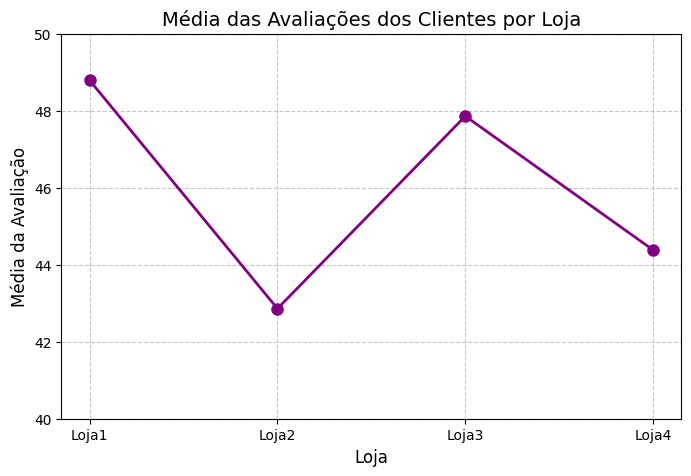

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


data = {
    'Loja': ['Loja1', 'Loja2', 'Loja3', 'Loja4'],
    'Avaliação da compra': [48.79, 42.86, 47.86, 44.38]
}

df = pd.DataFrame(data)

media_avaliacoes = df.groupby('Loja')['Avaliação da compra'].mean().reset_index()

print("Média das avaliações dos clientes por loja:")
print(media_avaliacoes)

plt.figure(figsize=(8, 5))
plt.plot(media_avaliacoes['Loja'], media_avaliacoes['Avaliação da compra'], marker='o', color='purple', linestyle='-', linewidth=2, markersize=8)
plt.title('Média das Avaliações dos Clientes por Loja', fontsize=14)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Média da Avaliação', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(40, 50)
plt.show()

# 4. Produtos Mais e Menos Vendidos

Produtos mais vendidos por loja:
    Loja                Produto  Quantidade de parcelas
0  Loja1     Assistente virtual                       8
1  Loja2         Mesa de jantar                       1
2  Loja3      Jogo de tabuleiro                       1
3  Loja4  Cadeira de escritório                       5

Produtos menos vendidos por loja:
    Loja                Produto  Quantidade de parcelas
0  Loja1     Assistente virtual                       8
1  Loja2         Mesa de jantar                       1
2  Loja3      Jogo de tabuleiro                       1
3  Loja4  Cadeira de escritório                       5


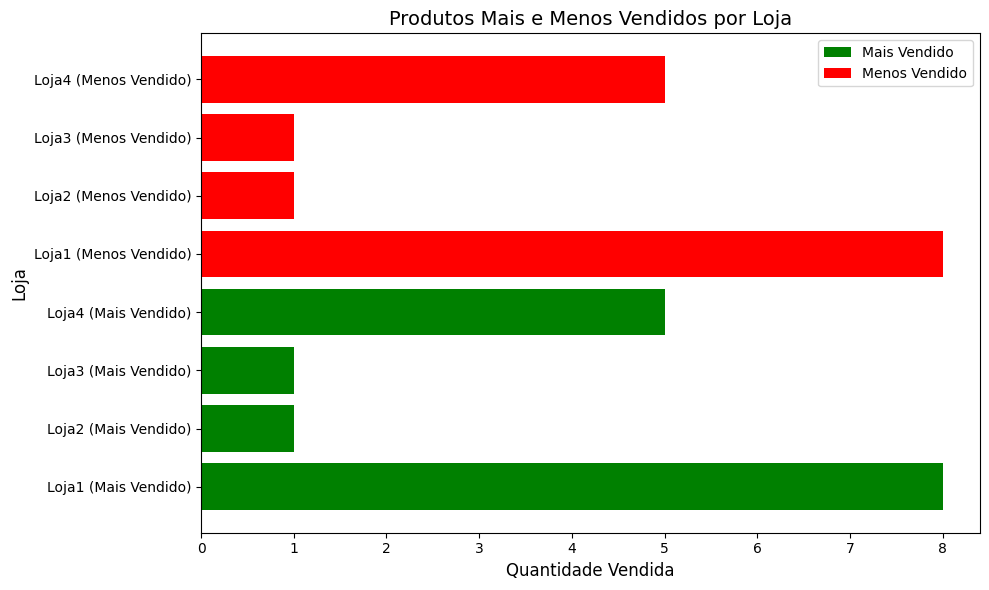

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Loja': ['Loja1', 'Loja2', 'Loja3', 'Loja4'],
    'Produto': ['Assistente virtual', 'Mesa de jantar', 'Jogo de tabuleiro', 'Cadeira de escritório'],
    'Quantidade de parcelas': [8, 1, 1, 5]
}

df = pd.DataFrame(data)

mais_vendidos = df.loc[df.groupby('Loja')['Quantidade de parcelas'].idxmax()]
menos_vendidos = df.loc[df.groupby('Loja')['Quantidade de parcelas'].idxmin()]

print("Produtos mais vendidos por loja:")
print(mais_vendidos)
print("\nProdutos menos vendidos por loja:")
print(menos_vendidos)

plt.figure(figsize=(10, 6))

plt.barh(mais_vendidos['Loja'] + ' (Mais Vendido)', mais_vendidos['Quantidade de parcelas'], color='green', label='Mais Vendido')
plt.barh(menos_vendidos['Loja'] + ' (Menos Vendido)', menos_vendidos['Quantidade de parcelas'], color='red', label='Menos Vendido')

plt.title('Produtos Mais e Menos Vendidos por Loja', fontsize=14)
plt.xlabel('Quantidade Vendida', fontsize=12)
plt.ylabel('Loja', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


Custo médio de frete por loja:
    Loja  Frete
0  Loja1   9.24
1  Loja2  21.23
2  Loja3  64.67
3  Loja4  26.96


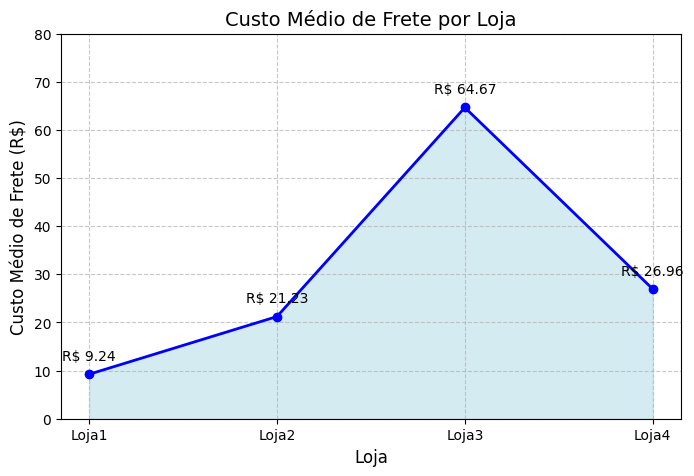

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Loja': ['Loja1', 'Loja2', 'Loja3', 'Loja4'],
    'Frete': [9.24, 21.23, 64.67, 26.96]
}

df = pd.DataFrame(data)

custo_medio_frete = df.groupby('Loja')['Frete'].mean().reset_index()

print("Custo médio de frete por loja:")
print(custo_medio_frete)

plt.figure(figsize=(8, 5))
plt.fill_between(custo_medio_frete['Loja'], custo_medio_frete['Frete'], color='lightblue', alpha=0.5)
plt.plot(custo_medio_frete['Loja'], custo_medio_frete['Frete'], marker='o', color='blue', linewidth=2)


for i, txt in enumerate(custo_medio_frete['Frete']):
    plt.annotate(f'R$ {txt:.2f}', (custo_medio_frete['Loja'][i], custo_medio_frete['Frete'][i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('Custo Médio de Frete por Loja', fontsize=14)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Custo Médio de Frete (R$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 80)
plt.show()

# **RELATÓRIO RESUMIDO**

## 1. Faturamento por Loja  
Loja1: R$ 1.535.499,12

Loja2: R$ 1.488.495,06  

Loja3: R$ 1.464.025,03  

Loja4: R$ 1.384.497,59  
> Loja1 tem o maior faturamento. Loja4 tem o menor.

## 2. Produtos Vendidos por Categoria  
Eletrônicos: Loja1 (4 unidades)  

Móveis: Loja4 (5 unidades)  

Brinquedos: Loja3 (1 unidade)  

> Loja4 se destaca em móveis. Loja3 vendeu pouco.

## 3. Avaliação Média dos Clientes  
Loja1: 48,79  

Loja2: 42,86  

Loja3: 47,86  

Loja4: 44,38  
> Loja1 tem os clientes mais satisfeitos. Loja2 tem a pior média.

## 4. Produto Mais Vendido por Loja  
 Loja1: Assistente virtual (8 unidades)  

Loja2: Mesa de jantar (1 unidade)  

Loja3: Jogo de tabuleiro (1 unidade)  

Loja4: Cadeira de escritório (5 unidades)  
> Loja1 teve o maior volume de vendas por produto.

## 5. Custo Médio de Frete  
Loja1: R$ 9,24  

Loja2: R$ 21,23  

Loja3: R$ 64,67  

Loja4: R$ 26,96  
> Loja1 tem o menor custo. Loja3, o maior.

---

## Recomendação Final

Loja3 é a menos vantajosa: baixo faturamento, poucas vendas, frete caro e avaliação média.

Loja1 é a mais promissora: alto faturamento, bom volume de vendas, menor frete e melhor avaliação.

### Sugestão:
O Senhor João deveria vender a Loja3 e investir mais na Loja1. Uma análise mais completa pode reforçar essa escolha.
